In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
songs_data = pd.DataFrame({
    'happy': [0.8, 0.7, 0.1, 0.2],
    'sad': [0.1, 0.3, 0.6, 0.9],
    'danceability': [0.9, 0.5, 0.3, 0.2],
    'liveliness': [0.8, 0.3, 0.2, 0.5],
})

songs_data

,happy,sad,danceability,liveliness
0,0.8,0.1,0.9,0.8
1,0.7,0.3,0.5,0.3
2,0.1,0.6,0.3,0.2
3,0.2,0.9,0.2,0.5


In [3]:
input_tags = songs_data[['happy', 'sad']]
input_tags

,happy,sad
0,0.8,0.1
1,0.7,0.3
2,0.1,0.6
3,0.2,0.9


In [4]:
output_tags = songs_data[['danceability', 'liveliness']]
output_tags

,danceability,liveliness
0,0.9,0.8
1,0.5,0.3
2,0.3,0.2
3,0.2,0.5


In [5]:
n = len(input_tags)
m = len(input_tags.columns)
p = len(output_tags.columns)

x = input_tags.to_numpy()
y = output_tags.to_numpy()

print(x)
print(y)

[[0.8 0.1]
 [0.7 0.3]
 [0.1 0.6]
 [0.2 0.9]]
[[0.9 0.8]
 [0.5 0.3]
 [0.3 0.2]
 [0.2 0.5]]


In [6]:
init_range = 0.1
w = np.random.uniform(low=-init_range, high=init_range, size=(m, p))
b = np.random.uniform(low=-init_range, high=init_range, size=(n, p))
eta = 0.05

In [7]:
for i in range(1000):
    y_hat = np.matmul(x, w) + b
    deltas = y_hat - y
    loss = np.sum(deltas ** 2) / (2 * n)
    deltas_scaled = deltas / n

    w = w - eta * np.matmul(x.T, deltas_scaled)
    b = b - eta * deltas_scaled

print(w)
print(b)
print(deltas)

[[0.49717262 0.33724464]
 [0.21730393 0.25671163]]
[[ 0.48053102  0.50453235]
 [ 0.08678855 -0.01308378]
 [ 0.11989968  0.01224871]
 [-0.09500772  0.20151027]]
[[-4.91593318e-07 -7.83433224e-07]
 [ 5.66008312e-07  9.70051494e-07]
 [-7.11281459e-07  1.53336566e-07]
 [ 3.40282983e-07 -3.38457038e-07]]


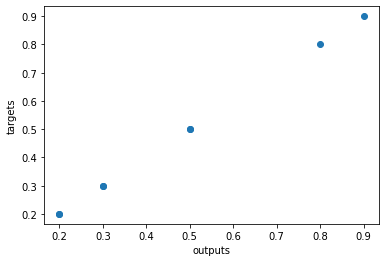

In [8]:
plt.scatter(y_hat, y)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [9]:
songs_data['danceability (predicted)'] = y_hat[:, 0]
songs_data['liveliness (predicted)'] = y_hat[:, 1]

songs_data

,happy,sad,danceability,liveliness,danceability (predicted),liveliness (predicted)
0,0.8,0.1,0.9,0.8,0.900000,0.799999
1,0.7,0.3,0.5,0.3,0.500001,0.300001
2,0.1,0.6,0.3,0.2,0.299999,0.200000
3,0.2,0.9,0.2,0.5,0.200000,0.500000
